In [1]:
import numpy as np 
import pandas as pd 

# for nlp
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# for stemming
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

# for Lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer #word stemmer class
lemma = WordNetLemmatizer()
lemmatizing = WordNetLemmatizer()
from nltk import FreqDist

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv('assets/data/data_cleaned_pd.csv', index_col=[0])
df.head(5)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,dysfunctional selfish drags kids dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...
2,3,0.0,bihday your majesty,majesty
3,4,0.0,#model i love u take with u all the time in ...,#model
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [3]:
def extract_hashtag(tweet):
    tweets = " ".join(filter(lambda x: x[0]== '#', tweet.split())) #filter those start with (#)
    tweets = re.sub('[^a-zA-Z]',' ',  tweets) #keep only alphabetics
    tweets = tweets.lower() #convert to lowercase
    tweets = [lemma.lemmatize(word) for word in tweets] #do lemmatization to hashtags
    tweets = "".join(tweets) #join tweets
    return tweets
df['hashtag'] = df.tweet.apply(extract_hashtag)
df.head(5)

,id,label,tweet,tidy_tweet,hashtag
0,1,0.0,@user when a father is dysfunctional and is s...,dysfunctional selfish drags kids dysfunction #run,run
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...,lyft disapointed getthanked
2,3,0.0,bihday your majesty,majesty,
3,4,0.0,#model i love u take with u all the time in ...,#model,model
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,motivation


In [4]:
# Most common hashtag
freq_all_hashtag = FreqDist(list((" ".join(df.hashtag)).split())).most_common(20)
freq_all_hashtag

[('love', 2442),
 ('positive', 1332),
 ('healthy', 904),
 ('smile', 856),
 ('thankful', 724),
 ('fun', 700),
 ('life', 677),
 ('summer', 587),
 ('model', 576),
 ('affirmation', 552),
 ('cute', 543),
 ('fathersday', 543),
 ('blog', 524),
 ('i', 520),
 ('me', 517),
 ('am', 477),
 ('beautiful', 464),
 ('altwaystoheal', 462),
 ('gold', 447),
 ('family', 446)]

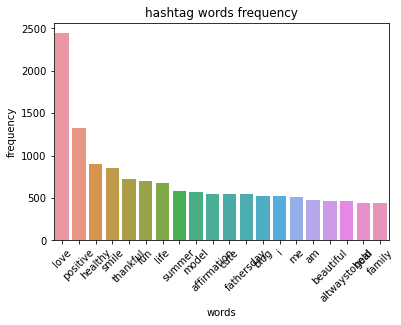

In [5]:
df_allhashtag = pd.DataFrame(freq_all_hashtag, columns=['words', 'frequency'])
sns.barplot(x='words', y='frequency', data=df_allhashtag)
plt.xticks(rotation = 45)
plt.title('hashtag words frequency')
plt.show()

In [6]:
# Most common hatred
freq_hatred_hashtag = FreqDist(list((" ".join(df[df['label']==1]['hashtag'])).split())).most_common(20)
freq_hatred_hashtag

[('trump', 134),
 ('politics', 95),
 ('allahsoil', 92),
 ('libtard', 76),
 ('liberal', 75),
 ('sjw', 74),
 ('retweet', 63),
 ('miami', 46),
 ('black', 44),
 ('hate', 32),
 ('tampa', 32),
 ('s', 28),
 ('bigot', 28),
 ('blm', 28),
 ('hispanic', 28),
 ('brexit', 27),
 ('sikh', 27),
 ('calgary', 27),
 ('temple', 26),
 ('wso', 26)]

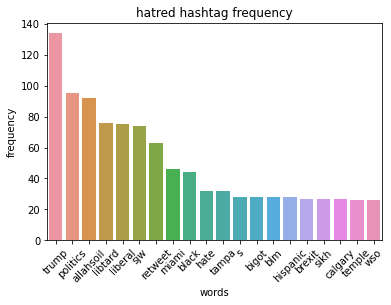

In [7]:
df_hatredhashtag = pd.DataFrame(freq_hatred_hashtag, columns=['words', 'frequency'])
sns.barplot(x='words', y='frequency', data=df_hatredhashtag)
plt.xticks(rotation = 45)
plt.title('hatred hashtag frequency')
plt.show()

#### Basic Features from Text
- Count number of words
- Count number of characters
- Average word length
- Number of stopwords
- Number of special characters
- Number of numerics
- Number of Uppercase words
- N-grams

In [8]:
# define word count function
def num_of_words(df):
    df['word_count'] = df['tweet'].apply(lambda x : len(str(x).split(" ")))
num_of_words(df)
df.head(5)

,id,label,tweet,tidy_tweet,hashtag,word_count
0,1,0.0,@user when a father is dysfunctional and is s...,dysfunctional selfish drags kids dysfunction #run,run,21
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...,lyft disapointed getthanked,22
2,3,0.0,bihday your majesty,majesty,,5
3,4,0.0,#model i love u take with u all the time in ...,#model,model,17
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,motivation,8


In [9]:
# Count number of characters
def num_of_characters(df):
    df['char_count'] = df['tweet'].str.len()
num_of_characters(df)
df.head(5)

,id,label,tweet,tidy_tweet,hashtag,word_count,char_count
0,1,0.0,@user when a father is dysfunctional and is s...,dysfunctional selfish drags kids dysfunction #run,run,21,102
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...,lyft disapointed getthanked,22,122
2,3,0.0,bihday your majesty,majesty,,5,21
3,4,0.0,#model i love u take with u all the time in ...,#model,model,17,86
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,motivation,8,39


In [10]:
# Average word length
def avg_word(sentence):
    words = sentence.split()
    average = sum(len(word) for word in words)/len(words)
    return average
def avg_word_length(df):
    df['avg_word'] = df['tweet'].apply(lambda x: avg_word(x))
avg_word_length(df)
df.head(5)

,id,label,tweet,tidy_tweet,hashtag,word_count,char_count,avg_word
0,1,0.0,@user when a father is dysfunctional and is s...,dysfunctional selfish drags kids dysfunction #run,run,21,102,4.555556
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...,lyft disapointed getthanked,22,122,5.315789
2,3,0.0,bihday your majesty,majesty,,5,21,5.666667
3,4,0.0,#model i love u take with u all the time in ...,#model,model,17,86,4.928571
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,motivation,8,39,8.000000


In [11]:
# Remove stop words
def stop_words(df):
    df['stopwords'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x in stopwords.words('english')]))
stop_words(df)
df.head()

,id,label,tweet,tidy_tweet,hashtag,word_count,char_count,avg_word,stopwords
0,1,0.0,@user when a father is dysfunctional and is s...,dysfunctional selfish drags kids dysfunction #run,run,21,102,4.555556,10
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...,lyft disapointed getthanked,22,122,5.315789,5
2,3,0.0,bihday your majesty,majesty,,5,21,5.666667,1
3,4,0.0,#model i love u take with u all the time in ...,#model,model,17,86,4.928571,5
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,motivation,8,39,8.000000,1


In [12]:
# Number of hashtag
def hash_tags(df):
    df['hashtags'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
hash_tags(df)
df.head()

,id,label,tweet,tidy_tweet,hashtag,word_count,char_count,avg_word,stopwords,hashtags
0,1,0.0,@user when a father is dysfunctional and is s...,dysfunctional selfish drags kids dysfunction #run,run,21,102,4.555556,10,1
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...,lyft disapointed getthanked,22,122,5.315789,5,3
2,3,0.0,bihday your majesty,majesty,,5,21,5.666667,1,0
3,4,0.0,#model i love u take with u all the time in ...,#model,model,17,86,4.928571,5,1
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,motivation,8,39,8.000000,1,1


In [14]:
df.to_csv("assets/data/data_analyzed_df.csv")